# <span style="color:darkblue"> Lecture 22 - Subsetting and Pivoting  </span>

<font size = "5">


<font size = "5">

In the previous class ...

- ... we introduced parsing and
- ... data manipulation with time

In this class we will ...

- Plot multiple series
- Compute growth rates
- Use merge/pivot to change layout of data

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs

import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Import data

In [20]:
financial = pd.read_csv("data_raw/financial.csv")

<font size = "5">

Parse data and sort dataset

In [21]:
financial["date"] = pd.to_datetime(financial["date_str"])
financial = financial.sort_values("date",ascending = True)

In [22]:
financial.dtypes

Unnamed: 0             int64
date_str              object
sp500                float64
djia                 float64
date_ex1              object
date_ex2              object
date_ex3              object
date          datetime64[ns]
dtype: object

In [23]:
# What does [ns] mean in the datetime64[ns] column type?
# [ns] stands for nano second-based time format that specifies the precision of the DateTime object

<font size = "5">

Plot multiple columns

/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be rem

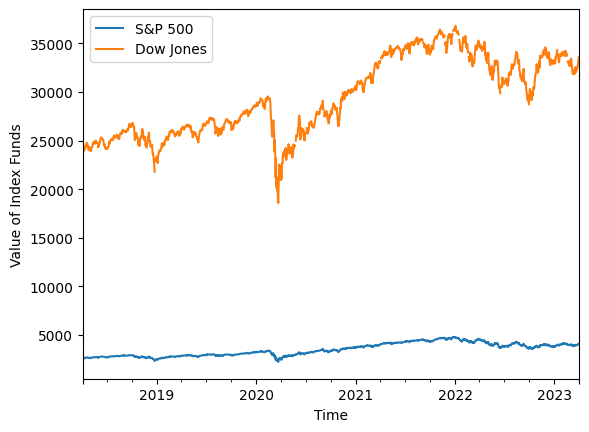

In [24]:

financial[["date","sp500","djia"]].set_index("date").plot()
# Plot function takes two sub-variables defined and plots them on the y-axis, the x-axis is defines as set_index("date")

plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])


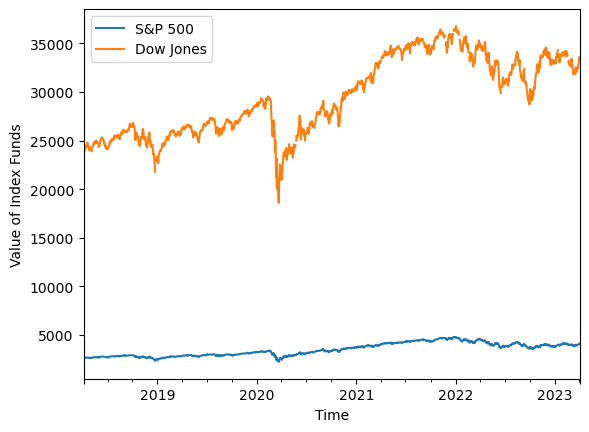

In [4]:
# Enter the x-axis column and y-axis columns you 
# wish to include. Specify the x-axis column with "set_index()"
# This applies to any line plot, with or without dates
# The legend is the box with the name of the lines
# If you drop the ".legend()" command this will assign
# the default column names to the legend.


financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])


In [25]:
# More sensible to compare the percentage growth because of what is stated below 

<font size = "5">

Remarks ...

- The S\&P 500 and Dow Jones have different units.
- More sensibile to compare their growth rate!


# <span style="color:darkblue"> II. Time Difference/Growth </span>

<font size = "5">

Change between periods

In [28]:
# First sort columns by date. The second computes the
# differences in "sp500" between each row and the one before it
# By convention, the first row gets a missing value because
# there is nothing to compare. For this to work, it's important
# that the dataset is sorted.

financial["diff_sp500"] = financial["sp500"].diff()

# .diff() function calculates the difference between two periods of time (same stock index, just subtracts previous amount to calculate the growth of the index across different periods of time)
# rate of growth  = (new - old) / (old)

In [27]:
financial 

,Unnamed: 0,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500
0,0,2018-04-04,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04","Apr-04, 18",2018-04-04,NaN
1,1,2018-04-05,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05","Apr-05, 18",2018-04-05,18.15
2,2,2018-04-06,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06","Apr-06, 18",2018-04-06,-58.37
3,3,2018-04-09,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09","Apr-09, 18",2018-04-09,8.69
4,4,2018-04-10,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10","Apr-10, 18",2018-04-10,43.71
...,...,...,...,...,...,...,...,...,...
1300,1300,2023-03-29,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29","Mar-29, 23",2023-03-29,56.54
1301,1301,2023-03-30,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30","Mar-30, 23",2023-03-30,23.02
1302,1302,2023-03-31,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31","Mar-31, 23",2023-03-31,58.48
1303,1303,2023-04-03,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03","Apr-03, 23",2023-04-03,15.20


<font size = "5">

Compute lag + percentage growth

In [30]:
# computing lag of variable (previous time period of the one you are currently on)
financial["lag_sp500"] = financial['sp500'].shift(1)
# The first value corresponds to the 0th value in the original data (moves everything 1 spot into the future)

In [31]:
financial

,Unnamed: 0,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500,lag_sp500
0,0,2018-04-04,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04","Apr-04, 18",2018-04-04,NaN,NaN
1,1,2018-04-05,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05","Apr-05, 18",2018-04-05,18.15,2644.69
2,2,2018-04-06,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06","Apr-06, 18",2018-04-06,-58.37,2662.84
3,3,2018-04-09,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09","Apr-09, 18",2018-04-09,8.69,2604.47
4,4,2018-04-10,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10","Apr-10, 18",2018-04-10,43.71,2613.16
...,...,...,...,...,...,...,...,...,...,...
1300,1300,2023-03-29,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29","Mar-29, 23",2023-03-29,56.54,3971.27
1301,1301,2023-03-30,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30","Mar-30, 23",2023-03-30,23.02,4027.81
1302,1302,2023-03-31,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31","Mar-31, 23",2023-03-31,58.48,4050.83
1303,1303,2023-04-03,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03","Apr-03, 23",2023-04-03,15.20,4109.31


In [34]:
# ".shif(1)" compute a new column with the value of "sp500"
# one period before. By convention the first column is assigned
# a missing value
# We can combine ".diff()" and ".shift()" to compute growth rates

financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]
# Finding growth rate ^^ (aka. doing the final division)
# Multiply by 100 to get it into a percentage 

In [35]:
financial.dtypes


Unnamed: 0               int64
date_str                object
sp500                  float64
djia                   float64
date_ex1                object
date_ex2                object
date_ex3                object
date            datetime64[ns]
diff_sp500             float64
lag_sp500              float64
growth_sp500           float64
dtype: object

<font size = "5">

Time between dates

In [38]:
financial["date"]-financial["date"].shift(2)
# Asking how many days have passsed between the observations 
# shift(2) would be every two days (time between two observations, 2 days on regular weekdays and 4 days on weekends)

0         NaT
1         NaT
2      2 days
3      4 days
4      4 days
        ...  
1300   2 days
1301   2 days
1302   2 days
1303   4 days
1304   4 days
Name: date, Length: 1305, dtype: timedelta64[ns]

In [40]:
# In the financial data example, the price of the stock portfolios isn't recorded
# on weekends. Sometimes it's important to account for these differences in the
# length between time periods, when accounting for growth rates
# Can compute dt.days, dt.months, dt.year, etc.

financial["diff_date"]  = financial["date"]-financial["date"].shift(1)
financial["count_days"] = financial["diff_date"].dt.days

In [41]:
financial

,Unnamed: 0,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500,lag_sp500,growth_sp500,diff_date,count_days
0,0,2018-04-04,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04","Apr-04, 18",2018-04-04,NaN,NaN,NaN,NaT,NaN
1,1,2018-04-05,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05","Apr-05, 18",2018-04-05,18.15,2644.69,0.686281,1 days,1.0
2,2,2018-04-06,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06","Apr-06, 18",2018-04-06,-58.37,2662.84,-2.192021,1 days,1.0
3,3,2018-04-09,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09","Apr-09, 18",2018-04-09,8.69,2604.47,0.333657,3 days,3.0
4,4,2018-04-10,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10","Apr-10, 18",2018-04-10,43.71,2613.16,1.672687,1 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1300,2023-03-29,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29","Mar-29, 23",2023-03-29,56.54,3971.27,1.423726,1 days,1.0
1301,1301,2023-03-30,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30","Mar-30, 23",2023-03-30,23.02,4027.81,0.571526,1 days,1.0
1302,1302,2023-03-31,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31","Mar-31, 23",2023-03-31,58.48,4050.83,1.443655,1 days,1.0
1303,1303,2023-04-03,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03","Apr-03, 23",2023-04-03,15.20,4109.31,0.369892,3 days,3.0


<font size = "5">

Plot growth

Text(0.5, 1.0, 'Change in the S&P 500 Index')

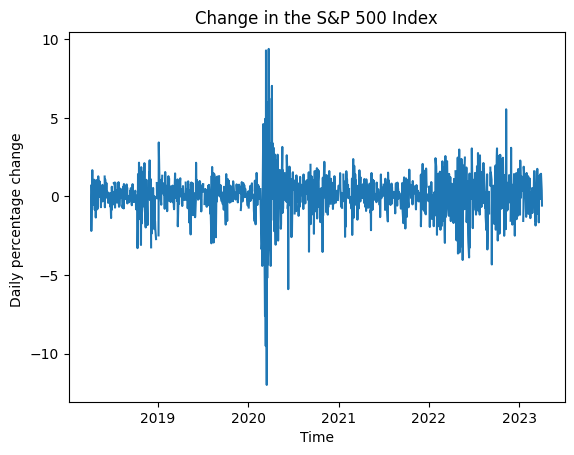

In [42]:
plt.plot("date", "growth_sp500",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 Index")

<font size = "5" >

Try it yourself!

- Compute a column with the growth of the Dow Jones
- Plot the growth of the S&P 500 and Dow Jones in a <br>
single plot

/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/Users/markarshavsky/anaconda3/envs/qtm151/lib/python3.11/site-packages/matplotlib/axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be rem

<Axes: xlabel='date'>

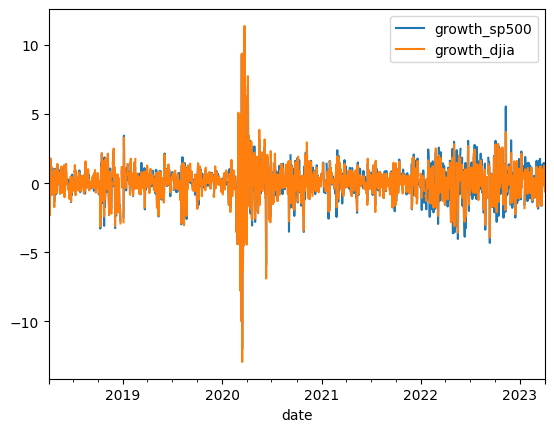

In [48]:
# Write your own code

financial["growth_djia"] = (financial["djia"].diff()/financial['djia'].shift(1)) * 100

# Doing rate of growth without defining other columns/variables 

financial[['date', 'growth_sp500', 'growth_djia']].set_index('date').plot()

# Learn how to change colors later ^^

# <span style="color:darkblue"> III. Subsetting with time data </span>

<font size = "5" >

Subsetting before/after

In [49]:
# Since the "date" column has a time format, Python
# will interpret "2019-01-01" as a date inside the query command
# Note: remember that you have to use single quotations for ".query()"

subset_before  = financial.query('date <= "2019-01-01" ')
subset_after   = financial.query('date >= "2020-01-01" ')

<font size = "5" >

Subsetting between two dates

In [50]:
# This command applies the function ".between()" to the column

subset_between = financial.query('date.between("2020-03-01","2020-05-01")')

<font size = "5">

Flag observations

In [51]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")
financial["bool_example"] = financial["growth_sp500"] > 5

<font size = "5">

Plot results

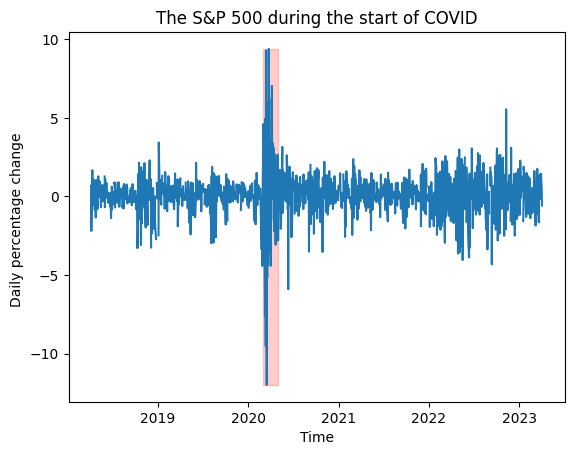

In [52]:
# Create a line plot
plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

<font size = "5">

Try it yourself!

- Generate a plot of the daily growth of the Dow Jones 
- Highlight regions where there was growth higher than 4\% <br>
or below -4\%

In [14]:
# Write your own code



# <span style="color:darkblue"> IV. Wide and Long Format </span>

<font size = "5">

Data can come in a wide variety of formats

- Few rows, multiple columns (wide)
- Stacked rows, few columns (long)
- The **information** is the same!

<font size = "5">

Wide to long

$\quad$ <img src="figures/melt_fig.png" alt="drawing" width="550"/>

In [15]:
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])

<font size = "5">

Long to wide

$\quad$ <img src="figures/pivot_fig.png" alt="drawing" width="550"/>

In [16]:
financial_wide = (pd.pivot(financial_long,
                           index = 'date',
                           columns = 'portfolio_type',
                           values =  'portfolio_value'))

# If you also want the index to be part of the dataset add
# ".reset_index()" to the end of the previous command

<font size = "5">

Try it yourself!

- Convert the "growth_sp500" and <br>
"growth_djia" to long format

In [17]:
# Write your own code
# Note: You can give any custom value to "var_name" or "value_name"


